# Automatic License Plate Detection and Recognition for Rural India

In [1]:
#GPU count and name
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-8d7da3fc-1fc3-10f6-6a05-20e4e01d8c33)


In [2]:
#use this command to see GPU activity while doing Deep Learning tasks, for this command 'nvidia-smi' and for above one to work, go to 'Runtime > change runtime type > Hardware Accelerator > GPU'
!nvidia-smi

Sat Dec 12 05:29:31 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!lscpu |grep 'Model name'

Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd ""/content/drive/My Drive/project_folder/darknet-master

/content/drive/.shortcut-targets-by-id/1xVaZt4D-z-KQXdYcNKDPK3SFngA7Rrjy/darknet-master


In [6]:
# Compile 
!make
!chmod +x ./darknet

chmod +x *.sh


In [7]:
! ./darknet detector train data/obj.data cfg/yolo-obj.cfg yolov4.conv.137 -dont_show

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolo-obj
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 ^C


In [ ]:
!./darknet detector train data/obj.data cfg/yolo-obj.cfg backup/yolo-obj_last.weights -dont_show

In [ ]:
!./darknet detector map data/obj.data cfg/yolo-obj.cfg backup/yolo-obj_final.weights

In [ ]:
!./darknet detector test data/obj.data cfg/yolo-obj.cfg backup/yolo-obj_last.weights

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
^C


In [8]:
!ls backup

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
yolo-obj_1000.weights  yolo-obj_final.weights
yolo-obj_2000.weights  yolo-obj_last.weights


In [9]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18,10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [10]:
# Check pre-installed CUDA version
!nvcc --version

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [12]:
## darknet run with external output flag to print bounding box coordinates
x = !./darknet detector test data/obj.data cfg/yolo-obj.cfg backup/yolo-obj_final.weights '/content/drive/My Drive/project_folder/darknet-master/car2.jpg' -ext_output

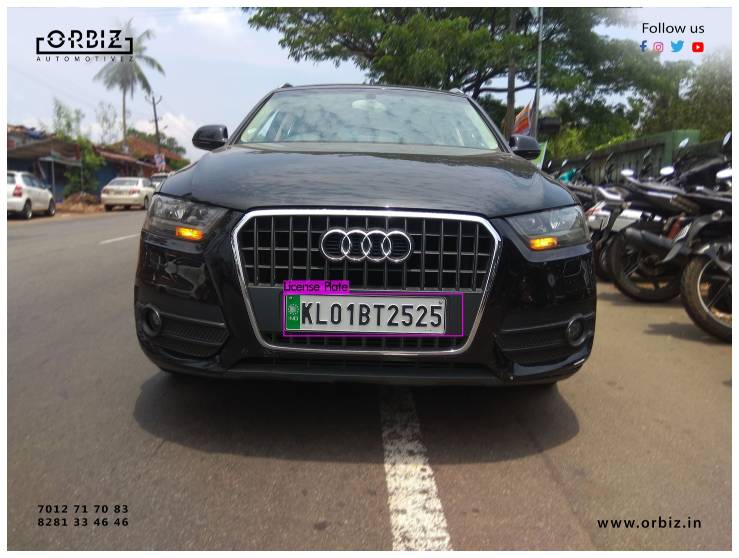

In [13]:
imShow('predictions.jpg')

In [14]:
# Extracting coordinates of the Bounding box of the License Plate from an Image
print(x)
y = x[len(x)-4]
print(y)

[' CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  ', ' OpenCV version: 3.2.0', ' 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 ', 'net.optimized_memory = 0 ', 'mini_batch = 1, batch = 64, time_steps = 1, train = 0 ', '   layer   filters  size/strd(dil)      input                output', '   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF', '   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF', '   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF', '   3 route  1 \t\t                           ->  208 x 208 x  64 ', '   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF', '   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF', '   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF', '   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF', '   8 conv     64       1 x 1/ 1    208 x 2

In [15]:
# Import regex (regular expressions )
import re
coord = [float(s) for s in re.findall(r'-?\d+\.?\d*', y)]
print(coord)

[98.0, 1587.0, 1643.0, 1031.0, 245.0]


In [16]:
def firstCrop(img, coordinates):
    
    xtop = int(coordinates[1])
    ytop = int(coordinates[2])
    xbottom = int(coordinates[1] + coordinates[3])
    ybottom = int(coordinates[2] + coordinates[4])
    firstCrop = img[ytop:ybottom, xtop:xbottom]
    cv2.rectangle(img,(xtop,ytop),(xbottom,ybottom),(0,255,0),3)
    return firstCrop

In [17]:
def plot_fig(Image):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  # image = cv2.imread(path)
  #height, width = image.shape[:2]
  #resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(8,4)
  plt.axis("off")
  #plt.imshow(cv2.cvtColor(firstCropImg, cv2.COLOR_BGR2RGB))
  plt.imshow(Image)
  plt.show()
  return ()

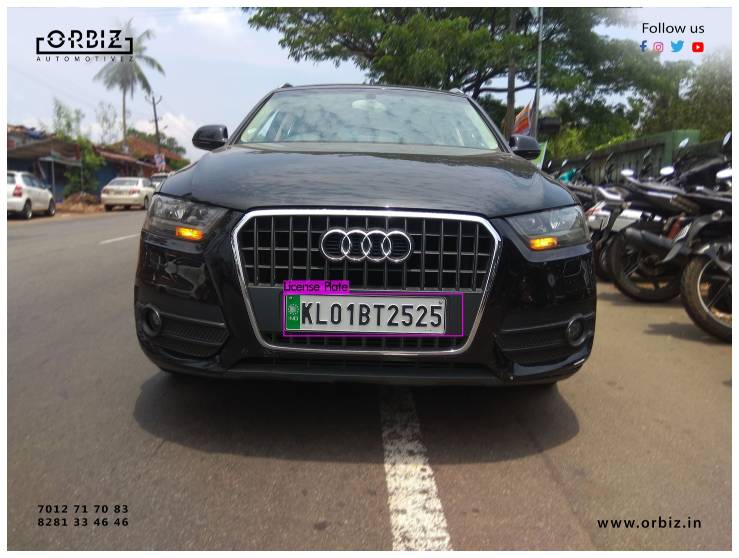

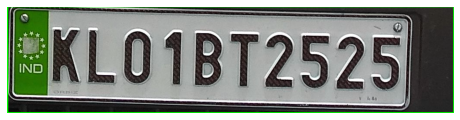

()

In [18]:
import cv2
image = cv2.imread('./car2.jpg')
firstCropImg = firstCrop(image,coord)
imShow('predictions.jpg')
plot_fig(firstCropImg)
#cv2.imwrite('./images/cropped_license_plate.png', firstCropImg )

In [19]:
def secondCrop(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.bilateralFilter(gray, 11,90, 90)
    edges = cv2.Canny(blur, 30, 200)
    #plot_fig(edges)
    cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


    image_copy = image.copy()
    _ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]
    plate = None
    for c in cnts:
        perimeter = cv2.arcLength(c, True)
        edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
        if len(edges_count) == 4:
            x,y,w,h = cv2.boundingRect(c)
            plate = image[y:y+h, x:x+w]
            break
    return plate

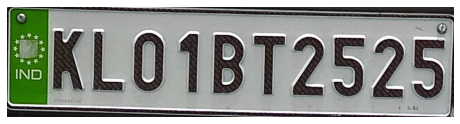

True

In [20]:
secondCropImg = secondCrop(firstCropImg)
plot_fig(secondCropImg)
# Save the cropped license plate Image to darknet folder
cv2.imwrite('./images/cropped_license_plate.png', secondCropImg )


##Deskew an image

In [ ]:
# Check the skew nature of license plate image using openCV library
# method 1
image = cv2.imread('./images/cropped_license_plate.png')
import numpy as np
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)

thresh = cv2.threshold(gray, 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
coords = np.column_stack(np.where(thresh > 0))
angle = cv2.minAreaRect(coords)[-1]

if angle < -45:
	angle = -(90 + angle)
 
else:
  angle = -angle

print(angle)


0.0


In [ ]:
# method 2
import sys

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as im
from scipy.ndimage import interpolation as inter

input_file = sys.argv[1]

img = im.open('./images/cropped_license_plate.png')

# convert to binary
wd, ht = img.size
pix = np.array(img.convert('1').getdata(), np.uint8)
bin_img = 1 - (pix.reshape((ht, wd)) / 255.0)
#plt.imshow(bin_img, cmap='gray')

def find_score(arr, angle):
    data = inter.rotate(arr, angle, reshape=False, order=0)
    hist = np.sum(data, axis=1)
    score = np.sum((hist[1:] - hist[:-1]) ** 2)
    return hist, score


delta = 1
limit = 5
angles = np.arange(-limit, limit+delta, delta)
scores = []
for angle in angles:
    hist, score = find_score(bin_img, angle)
    scores.append(score)

best_score = max(scores)
best_angle = angles[scores.index(best_score)]
print('Best angle: {}'.format(best_angle))

Best angle: 1


# License Plate Recognition ( Without character Segmentation )

In [21]:
# Installing pytesseract and Pillow
!apt-get install tesseract-ocr
!pip install pytesseract
!pip install Pillow

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 14 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,750 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 144865 files and directories currently installed.)
Preparing to unpack .../tesserac

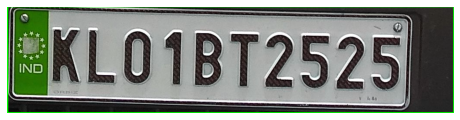

()

In [ ]:
plot_fig(firstCropImg)

#License Plate Recognition Using Tesseract OCR Engine

In [22]:
# Number Plate Recognition -1 - Tesseract OCR Engine
print("Without Image Pre-processing : ")
!python ocr.py --image images/cropped_license_plate.png 

Without Image Pre-processing : 
EKLO1BT2525



In [ ]:
try:
	from PIL import Image
except ImportError:
	import Image

import pytesseract
#oem was 3
def ocr_core(filename):
	custom_oem_psm_config = r'--oem 3 --psm 6'
	text = pytesseract.image_to_string(Image.open(filename),lang='eng',config=custom_oem_psm_config)
	return text
	'''#configuration setting to convert image to string.  
	configuration = ("-l eng --oem 1 --psm 8")
    ##This will recognize the text from the image of bounding box
	text = pytesseract.image_to_string(r, config=configuration) '''

In [ ]:
# License Plate recognition -2
print(ocr_core('./images/cropped_license_plate.png'))

EKLO1BT2525


In [ ]:
!man tesseract

TESSERACT(1)                                                      TESSERACT(1)

NNAAMMEE
       tesseract - command-line OCR engine

SSYYNNOOPPSSIISS
       tteesssseerraacctt _i_m_a_g_e_n_a_m_e|_s_t_d_i_n _o_u_t_p_u_t_b_a_s_e|_s_t_d_o_u_t [options...]
       [configfile...]

DDEESSCCRRIIPPTTIIOONN
       tesseract(1) is a commercial quality OCR engine originally developed at
       HP between 1985 and 1995. In 1995, this engine was among the top 3
       evaluated by UNLV. It was open-sourced by HP and UNLV in 2005, and has
       been developed at Google since then.

IINN//OOUUTT AARRGGUUMMEENNTTSS
       _i_m_a_g_e_n_a_m_e
           The name of the input image. Most image file formats (anything
           readable by Leptonica) are supported.

       _s_t_d_i_n
           Instruction to read data from standard input

       _o_u_t_p_u_t_b_a_s_e
           The basename of the output 

#License Plate Recognition ( With Character Segmentation )


In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import glob

In [24]:
def preprocess_image(image_path,resize=False):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255
    if resize:
        img = cv2.resize(img, (224,224))
    return img

test_image_path = "./car2.jpg"
vehicle = preprocess_image(test_image_path)
#LpImg = cv2.imread('./images/cropped_license_plate.jpg')
#cor = get_plate(test_image_path)

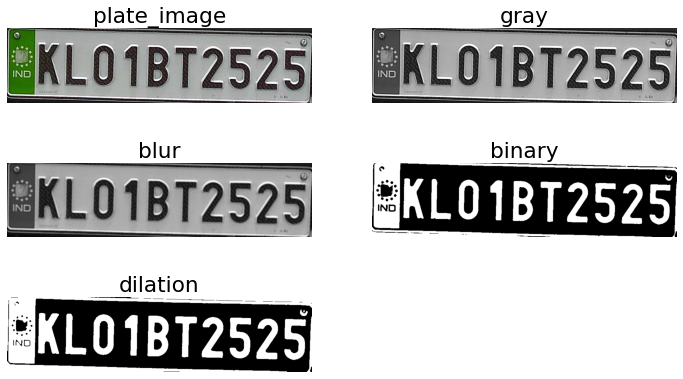

In [25]:
img = cv2.imread('./images/cropped_license_plate.png')

# resizing the image
#img = cv2.resize(img, (110,470))
#print(img.shape[:2])

# Scales, calculates absolute values, and converts the result to 8-bit.
plate_image = cv2.convertScaleAbs(img)
# convert to grayscale and blur the image
gray = cv2.cvtColor(plate_image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(7,7),0)
    
# Applied inversed thresh_binary 
binary = cv2.threshold(blur, 180, 255,
                         cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# save the binary image to drive 
cv2.imwrite('./binary.png',binary)    
kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
thre_mor = cv2.morphologyEx(binary, cv2.MORPH_DILATE, kernel3)

    
# visualize results    
fig = plt.figure(figsize=(12,7))
plt.rcParams.update({"font.size":18})
grid = gridspec.GridSpec(ncols=2,nrows=3,figure = fig)
plot_image = [plate_image, gray, blur, binary,thre_mor]
plot_name = ["plate_image","gray","blur","binary","dilation"]

for i in range(len(plot_image)):
    fig.add_subplot(grid[i])
    plt.axis(False)
    plt.title(plot_name[i])
    if i ==0:
        plt.imshow(plot_image[i])
    else:
        plt.imshow(plot_image[i],cmap="gray")


In [26]:
#filename = './images/cropped_license_plate.png'
filename = './binary.png'
custom_oem_psm_config = r'--oem 1 --psm 9'
text = pytesseract.image_to_string(Image.open(filename),lang='eng',config=custom_oem_psm_config)
print("License Plate Number :",text)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-26-31fda49d5803>", line 4, in <module>
    text = pytesseract.image_to_string(Image.open(filename),lang='eng',config=custom_oem_psm_config)
NameError: name 'pytesseract' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_

NameError: ignored

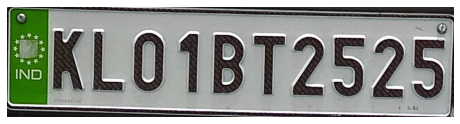

(225, 915)
Detect 10 letters...


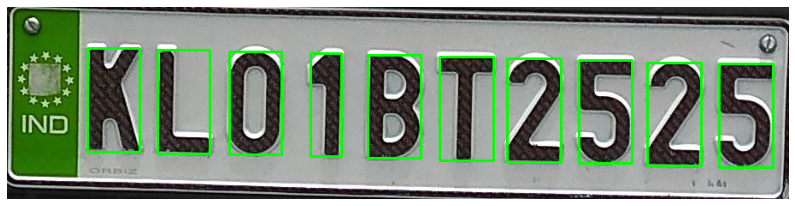

<Figure size 1008x288 with 0 Axes>

In [ ]:

# Create sort_contours() function to grab the contour of each digit from left to right
def sort_contours(cnts,reverse = False):
    i = 0
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))
    return cnts

cont, _  = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
'''
# Resize  plate image for charcater segmentation to work
height, width = plate_image.shape[:2]
print(height)
print(width)
if height < 110 :
  n = round(110/63)
else:
  n = 1
plate_image = cv2.resize(plate_image,(470 ,110), interpolation = cv2.INTER_CUBIC)

'''
# creat a copy version "test_roi" of plat_image to draw bounding box
test_roi = plate_image.copy()
plot_fig(test_roi)
#test_roi= cv2.resize(test_roi ,(470,110),interpolation = cv2.INTER_LINEAR)
print(test_roi.shape[:2])
# Initialize a list which will be used to append charater image
crop_characters = []

# define standard width and height of character
digit_w, digit_h = 30,60

for c in sort_contours(cont):
    (x, y, w, h) = cv2.boundingRect(c)
    ratio = h/w
    if 1<=ratio<=3.5: # Only select contour with defined ratio
        if h/plate_image.shape[0]>=0.5: # Select contour which has the height larger than 50% of the plate
            # Draw bounding box arroung digit number
            cv2.rectangle(test_roi, (x, y), (x + w, y + h), (0, 255,0), 2)

            # Sperate number and gibe prediction
            curr_num = thre_mor[y:y+h,x:x+w]
            curr_num = cv2.resize(curr_num, dsize=(digit_w, digit_h))
            _, curr_num = cv2.threshold(curr_num, 220, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            crop_characters.append(curr_num)

print("Detect {} letters...".format(len(crop_characters)))
fig = plt.figure(figsize=(14,20)) # (10,6)
plt.axis(False)
plt.imshow(test_roi)
plt.savefig('grab_digit_contour.png')

fig = plt.figure(figsize=(14,4))
grid = gridspec.GridSpec(ncols=len(crop_characters),nrows=1,figure=fig)

In [27]:
fig = plt.figure(figsize=(14,4))
grid = gridspec.GridSpec(ncols=len(crop_characters),nrows=1,figure=fig)

for i in range(len(crop_characters)):
    fig.add_subplot(grid[i])
    plt.axis(False)
    plt.imshow(crop_characters[i],cmap="gray")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-27-01474a531eb5>", line 2, in <module>
    grid = gridspec.GridSpec(ncols=len(crop_characters),nrows=1,figure=fig)
NameError: name 'crop_characters' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/

NameError: ignored

<Figure size 1008x288 with 0 Axes>

# Character Recognition Using Pytesseract

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


A


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


a



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


:
;


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


i


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


V4
-"


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


/
a


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


Character Recognition Using Tesseract :  Aa:;iV4-"/a


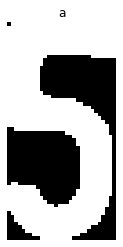

In [ ]:
final_string = ''
for i,character in enumerate(crop_characters):
    fig.add_subplot(grid[i])
    #title = np.array2string(predict_from_model(character,model,labels))
    custom_oem_psm_config = r'--oem 1 --psm 9 '

    title = str(pytesseract.image_to_string(crop_characters[i],lang='eng',config=custom_oem_psm_config))
    print(title)
    plt.title('{}'.format(title.strip("'[]"),fontsize=20))
    final_string+=title.strip("'[]")
    plt.axis(False)
    plt.imshow(character,cmap='gray')

print("Character Recognition Using Tesseract : ", final_string)

In [ ]:
custom_oem_psm_config = r'--oem 1 --psm 10 '
for i,character in enumerate(crop_characters):
    text = pytesseract.image_to_string(crop_characters[i],lang='eng',config=custom_oem_psm_config)
    print(text,end = '')

Aa'::iV4»Vi2

#Load pre-trained MobileNets model and predict

In [29]:
from keras.models import model_from_json
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.mobilenet_v2 import preprocess_input
from sklearn.preprocessing import LabelEncoder

In [30]:
# Load model architecture, weight and labels
json_file = open('./Plate_detect_and_recognize/MobileNets_character_recognition.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights("./Plate_detect_and_recognize/License_character_recognition_weight.h5")
print("[INFO] Model loaded successfully...")

labels = LabelEncoder()
labels.classes_ = np.load('./Plate_detect_and_recognize/license_character_classes.npy')
print("[INFO] Labels loaded successfully...")

FileNotFoundError: ignored

In [ ]:
# pre-processing input images and pedict with model
def predict_from_model(image,model,labels):
    image = cv2.resize(image,(80,80))
    image = np.stack((image,)*3, axis=-1)
    prediction = labels.inverse_transform([np.argmax(model.predict(image[np.newaxis,:]))])
    return prediction

License Plate Number : KL01BT2525


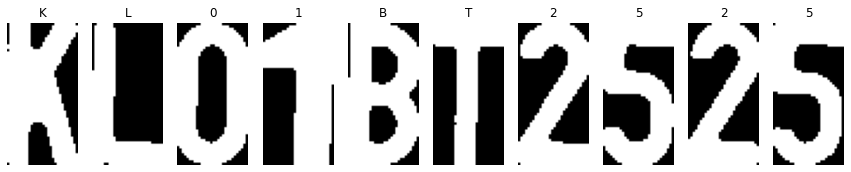

In [ ]:
fig = plt.figure(figsize=(15,3))
cols = len(crop_characters)
grid = gridspec.GridSpec(ncols=cols,nrows=1,figure=fig)

final_string = ''
for i,character in enumerate(crop_characters):
    fig.add_subplot(grid[i])
    title = np.array2string(predict_from_model(character,model,labels))
    #print(title)
    plt.title('{}'.format(title.strip("'[]"),fontsize=20))
    final_string+=title.strip("'[]")
    plt.axis(False)
    plt.imshow(character,cmap='gray')

print("License Plate Number :",final_string)
#plt.savefig('final_result.png', dpi=300)

# The Futher Steps - Getting Vehicle Owner's Details Using License Plate Number

1.   https://www.cars24.com/blog/how-to-get-vehicle-owner-information/#:~:text=Type%20VAHAN%20Registration%20Number,VAHAN%20SMS%20No%3A%2077382%2D99899
2.   https://vahan.nic.in/nrservices/faces/user/searchstatus.xhtml
3.   https://drive.google.com/file/d/1SyLeO3GgXHrXiBa-qa_zmq0hloYZ5T2z/view?usp=sharing




In [ ]:
!pwd

/content/drive/.shortcut-targets-by-id/1xVaZt4D-z-KQXdYcNKDPK3SFngA7Rrjy/darknet-master


In [ ]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
 
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
 
    # return the edged image
    return edged

import cv2
image = cv2.imread('./images/cropped_license_plate.jpg')
edged_image = auto_canny(image)
plot_fig(edged_image)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh_inv = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,39,1)
edges = auto_canny(thresh_inv)
ctrs, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
img_area = img.shape[0]*img.shape[1]
for i, ctr in enumerate(sorted_ctrs):
    x, y, w, h = cv2.boundingRect(ctr)
    roi_area = w*h
    roi_ratio = roi_area/img_area
if((roi_ratio >= 0.015) and (roi_ratio < 0.09)):
        if ((h>1.2*w) and (3*w>=h)):
            cv2.rectangle(img,(x,y),( x + w, y + h ),(90,0,255),2)

In [ ]:
%cd "/content/drive/My Drive/darknet-master/"
!./darknet detector test data/voc.data yolo-voc.cfg yolo-voc.weights -dont_show < data/test.txt > result.txt

In [ ]:
! ./darknet detector test cfg/voc.data yolo-voc.cfg yolo-voc.weights -dont_show -ext_output < data/test.txt > result.txt

#Yolo V4 : Darknet to Tensorflow

In [ ]:
!pwd

/content/drive/.shortcut-targets-by-id/1xVaZt4D-z-KQXdYcNKDPK3SFngA7Rrjy/darknet-master


In [ ]:
!git clone https://github.com/hunglc007/tensorflow-yolov4-tflite

Cloning into 'tensorflow-yolov4-tflite'...
remote: Enumerating objects: 704, done.
remote: Total 704 (delta 0), reused 0 (delta 0), pack-reused 704
Receiving objects: 100% (704/704), 176.13 MiB | 744.00 KiB/s, done.
Resolving deltas: 100% (330/330), done.
Checking out files: 100% (125/125), done.


In [ ]:
!ls -a

3rdparty    chart_yolo-obj.png	    ocr.py
99.jpg	    .circleci		    out.gdoc
backup	    cmake		    out.png.txt
bad.list    CMakeLists.txt	    output.txt
binary.png  coord.txt		    output.txt.txt
build	    darknet		    out.txt
build.ps1   DarknetConfig.cmake.in  out.txt.txt
build.sh    darknet.py		    Plate_detect_and_recognize
car10.jpg   darknet.py.gdoc	    predictions.jpg
car11.jpg   darknet_video.py	    preprocess_image.py
car12.jpg   data		    __pycache__
car13.jpg   .github		    README.md
car1.jpg    .gitignore		    results
car2.jpg    images		    result.txt
car3.jpeg   image_yolov2.sh	    scripts
car4.jpg    image_yolov3.sh	    src
car5.jpg    include		    tensorflow-yolov4-tflite
car6.jpg    json_mjpeg_streams.sh   .travis.yml
car7.jpg    LICENSE		    video_v2.sh
car8.JPG    Makefile		    video_yolov3.sh
car9.jpg    multicar_image.jpg	    yolov4.conv.137
cfg	    net_cam_v3.sh
chart.png   obj


In [ ]:
%cd tensorflow-yolov4-tflite

/content/drive/.shortcut-targets-by-id/1xVaZt4D-z-KQXdYcNKDPK3SFngA7Rrjy/darknet-master/tensorflow-yolov4-tflite


In [ ]:
!pwd
!ls -a

/content/drive/.shortcut-targets-by-id/1xVaZt4D-z-KQXdYcNKDPK3SFngA7Rrjy/darknet-master/tensorflow-yolov4-tflite
android		    core	    LICENSE		  result-int8.png
benchmarks.py	    data	    mAP			  result.png
CODE_OF_CONDUCT.md  detect.py	    README.md		  save_model.py
convert_tflite.py   detectvideo.py  requirements-gpu.txt  scripts
convert_trt.py	    evaluate.py     requirements.txt	  train.py


In [ ]:
!pip install absl-py

In [ ]:
!python save_model.py --weights /content/drive/.shortcut-targets-by-id/1xVaZt4D-z-KQXdYcNKDPK3SFngA7Rrjy/darknet-master/backup/yolo-obj_final.weights --output ./checkpoints/yolov4-416 --input_size 416 --model yolov4 


2020-07-21 08:04:42.227151: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-07-21 08:04:43.761107: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-07-21 08:04:43.766454: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-07-21 08:04:43.767036: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-07-21 08:04:43.767072: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-07-21 08:04:43.768835: I tensorflow/stream_executor/platform/default